In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
plt.rcParams['figure.figsize'] = (10, 7)

In [3]:
customers = pd.read_csv('./data/e-commerce-customers.csv')
customers.head(3)

Email  \
0  mstephenson@fernandez.com   
1          hduke@hotmail.com   
2           pallen@yahoo.com   

                                             Address     Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605     Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576  DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...     Bisque   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505

In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
customers.describe()

Avg. Session Length  Time on App  Time on Website  \
count           500.000000   500.000000       500.000000   
mean             33.053194    12.052488        37.060445   
std               0.992563     0.994216         1.010489   
min              29.532429     8.508152        33.913847   
25%              32.341822    11.388153        36.349257   
50%              33.082008    11.983231        37.069367   
75%              33.711985    12.753850        37.716432   
max              36.139662    15.126994        40.005182   

       Length of Membership  Yearly Amount Spent  
count            500.000000           500.000000  
mean               3.533462           499.314038  
std                0.999278            79.314782  
min                0.269901           256.670582  
25%                2.930450           445.038277  
50%                3.533975           498.887875  
75%                4.126502           549.313828  
max                6.922689           765.518462

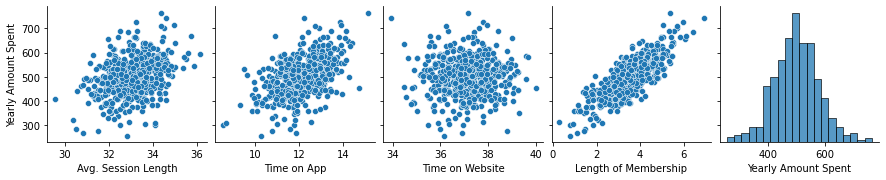

In [5]:
sns.pairplot(customers, y_vars='Yearly Amount Spent')

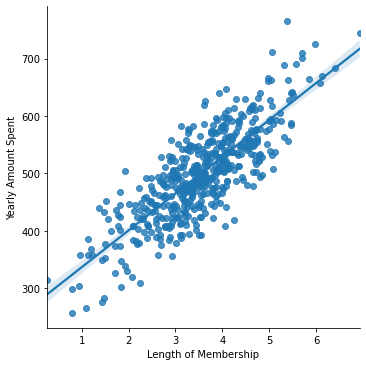

In [8]:
sns.lmplot(data=customers, x='Length of Membership', y='Yearly Amount Spent')

<AxesSubplot:>

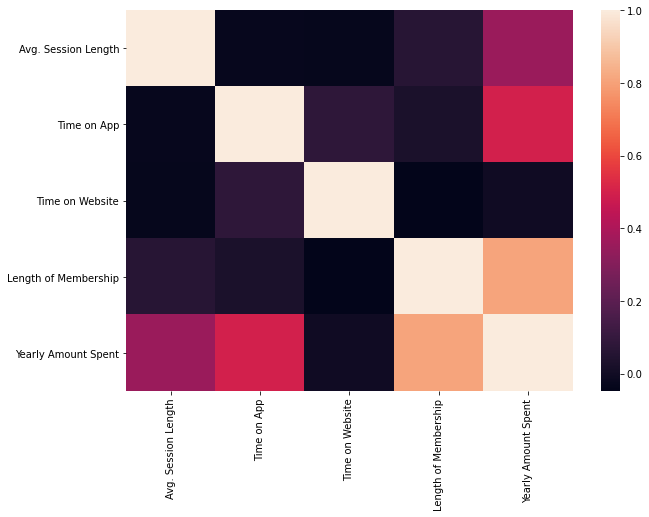

In [6]:
sns.heatmap(data=customers.corr())

In [9]:
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

![korrelationskoeffizienten](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/2880px-Correlation_examples2.svg.png)

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)
print(model.coef_, model.intercept_)

[25.72425621 38.59713548  0.45914788 61.67473243] -1050.653674664572


In [12]:
importances = pd.DataFrame(data=model.coef_, index=X_train.columns)
importances

0
Avg. Session Length   25.724256
Time on App           38.597135
Time on Website        0.459148
Length of Membership  61.674732

Text(0, 0.5, 'Vorhergsagte y-Werte')

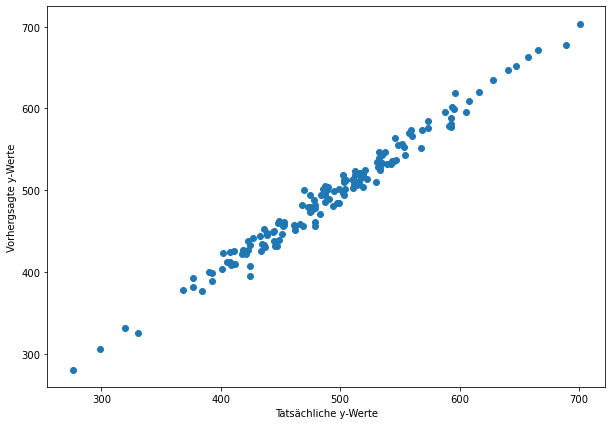

In [13]:
predictions = model.predict(X_test)
plt.scatter(y_test, predictions)
plt.xlabel('Tatsächliche y-Werte')
plt.ylabel('Vorhergsagte y-Werte')

In [14]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
mse = metrics.mean_squared_error(y_test, predictions)
print('MSE: ', mse)
print('RMSE:', np.sqrt(mse))
print('Score = R²: ', model.score(X_test, y_test))

MAE: 8.426091641432052
MSE:  103.91554136503235
RMSE: 10.193897260863107
Score = R²:  0.9808757641125857


C:\Users\chris\anaconda3\envs\Machine-Learning\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Density'>

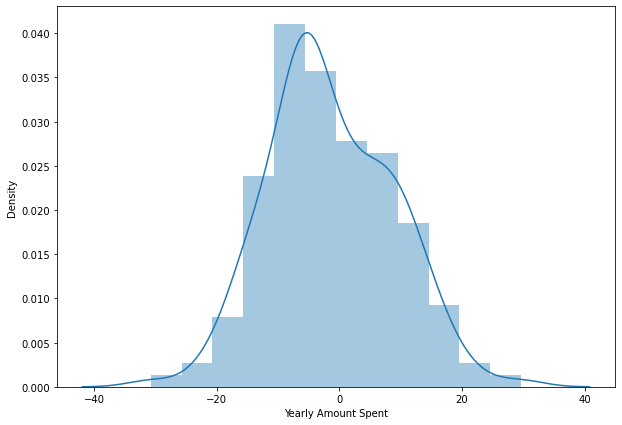

In [15]:
sns.distplot((y_test - predictions))